# Project: ' WeRateDogs' Investigation:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href='#gathering'>Data Gathering</a></li> 
<li><a href="#assessing">Data Assessing</a></li>
<li><a href="#report">Assess Report</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#questions">Questions:</a></li>
<li><a href="#summary">Summary:</a></li>
</ul>

<a id='intro'></a>
### Introduction:
The main focus of this project is to wrangle data in the best possible manner. We will clean it both qualitatively and on the bases of tidiness. After that, we will ask questions and then through data analysis tools produce conclusions.

<a id='gathering'></a>
# Gather

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import responses
%matplotlib inline

### Twitter archieve data

In [155]:
twitter_arc = pd.read_csv('twitter-archive-enhanced.csv')

### The tweet image predictions

In [156]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#get response
response = requests.get(url)
#write return to an image
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [157]:
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

### Retweet count and Favorite count data

In [158]:
# my developer account is not enabled, including the code from 'twitter_api.py'
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
d = {'tweet_id': []}
df_1 = pd.DataFrame(data=d)

#df_1 = pd.DataFrame(column )

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

0.001677500000027976
{}


In [159]:
# Please don't mind the above mess, I don't have a twitter account. this is how I gathered data.
# Manually downloaded the tweet-json.txt file from the udacity site.
data = []
with open('tweet-json.txt', 'r') as readfile:
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()

tweet_api_data = pd.DataFrame.from_dict(data)

<a id='assessing'></a>
## Assess

### 1. twitter_arc

In [160]:
twitter_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [161]:
twitter_arc.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [162]:
# getting familiar with the columns
twitter_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [163]:
# what does source has
twitter_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [164]:
# shape of this dataset
twitter_arc.shape

(2356, 17)

In [165]:
twitter_arc.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [166]:
twitter_arc.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [167]:
# percentage of dogs which belongs to any of the category.
len(twitter_arc.query('puppo == "puppo" | pupper == "pupper" | floofer == "floofer" | doggo == "doggo"'))/ twitter_arc.shape[0]  * 100

16.129032258064516

In [168]:
# percentage of dogs which do not belong in any category.
len(twitter_arc.query('puppo == "None" & pupper == "None" & floofer == "None" & doggo == "None"'))/ twitter_arc.shape[0]  * 100

83.87096774193549

In [169]:
twitter_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [170]:
# checking for rating denominator different than 10.
twitter_arc.query('rating_denominator ! = "10"').rating_denominator.count()

23

In [171]:
# checking for rating numerator less  than 10.
twitter_arc.query('rating_numerator < 10').rating_numerator.count()

440

In [172]:
twitter_arc.query('rating_numerator <10 & rating_denominator == 10').rating_numerator.mean()

7.184331797235023

In [173]:
twitter_arc.query('rating_denominator > 10 ')[:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [174]:
# dog names
twitter_arc.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [175]:
# 10 most popular dog names
twitter_arc.name.value_counts()[:10]

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Penny       10
Lola        10
Tucker      10
Winston      9
Name: name, dtype: int64

In [176]:
# observing the structure of source
twitter_arc.source.sample(3)

2094    <a href="http://twitter.com/download/iphone" r...
1198    <a href="http://twitter.com/download/iphone" r...
1382    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [177]:
# number of retweeted rows:
twitter_arc.retweeted_status_id.value_counts().count()

181

### 2. img_pred

In [178]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [179]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [180]:
img_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [181]:
img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [182]:
# seeing if prediction 1 has lower accuracy then prediction 2
len(img_pred.query('p1_conf < p2_conf'))

0

In [183]:
# seeing if prediction 2 has lower accuracy then prediciton 1
len(img_pred.query('p2_conf < p3_conf'))

0

In [184]:
# 10 most common dog breed predicted
img_pred.p1.value_counts()[:10]

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1, dtype: int64

In [185]:
# percentage change in the confermation rate of 1st and 2nd prediction
(img_pred.p1_conf.mean() - img_pred.p2_conf.mean()) * 100

45.99596541140664

In [186]:
# Checking if p1_dog is useful or not
img_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [187]:
img_pred.query('~p1_dog & p2_dog').count()

tweet_id    155
jpg_url     155
img_num     155
p1          155
p1_conf     155
p1_dog      155
p2          155
p2_conf     155
p2_dog      155
p3          155
p3_conf     155
p3_dog      155
dtype: int64

In [188]:
# No duplicated rows
img_pred.duplicated().sum()

0

### 3. tweet_api_data

In [189]:
tweet_api_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [190]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [191]:
# understanding the columns, what's in it
tweet_api_data.in_reply_to_status_id_str.value_counts()[:10]

667152164079423490    2
678021115718029313    1
870726202742493184    1
863425645568774144    1
665814696700723200    1
729113531270991872    1
670668383499735048    1
879553827334172678    1
685547936038666240    1
750180498832404480    1
Name: in_reply_to_status_id_str, dtype: int64

In [192]:
# exploring different columns
tweet_api_data.in_reply_to_user_id_str.value_counts()[:10]

4196983835            47
21955058               2
1582853809             1
1198988510             1
16374678               1
730505014150582272     1
2894131180             1
47384430               1
840547864354918400     1
2319108198             1
Name: in_reply_to_user_id_str, dtype: int64

In [193]:
tweet_api_data.is_quote_status.value_counts()[:10]

False    2323
True       31
Name: is_quote_status, dtype: int64

In [194]:
# As 99 % of language is english we don't need it, as it isn't giving us anything useful
tweet_api_data.lang.value_counts()

en     2336
und       7
nl        3
in        3
ro        1
eu        1
tl        1
et        1
es        1
Name: lang, dtype: int64

In [195]:
# exploring the type of data posssible sensitive appealable have
tweet_api_data.possibly_sensitive_appealable.unique()

array([False, nan], dtype=object)

In [196]:
# viewing the most common sources
tweet_api_data.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [197]:
# Seeing the similarities between twitter_arc and tweet_api_data sources.
twitter_arc.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [198]:
tweet_api_data.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [199]:
# favorited is almost False in all of the cases. Don't require it for analysis, as it will not ad anything to our analysis.
tweet_api_data.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [200]:
# is_quote_status is almost False in all of the cases, only 31 True values. Don't need for analysis with that small rate
tweet_api_data.is_quote_status.value_counts()

False    2323
True       31
Name: is_quote_status, dtype: int64

In [201]:
# these are the common columns in the 3 dataset
all_columns = pd.Series(list(twitter_arc) + list(img_pred) + list(tweet_api_data))
all_columns[all_columns.duplicated()]

17                 tweet_id
42    in_reply_to_status_id
44      in_reply_to_user_id
57                   source
dtype: object

<a id='report'></a>
# Report:
## Quality 

`twitter_arc` table
 - Erroneous datatypes(tweet_id, timestamp).
 - Source is in a wrong format, similar to HTML anchor tags.
 - Doggo, floofer, pupper, puppo has 'None' value which is misinterpreted as a real value instead of NaN.
 - These columns are almost empty or non-useful or are not meaningful and therefore not useful for our analysis : ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls')
 - Only 16.13% of dogs comes in any of the 4 categories (doggo, floofer, pupper, puppo). 83.87 % has none value.
 - Ratings in some rows which has decimal points in the text, are not taken correctly.
 - Some of the rating values are also wrong. Text with decimal point has incorrectly read the rating need to change that.
 - Denominator have value 10 or a multiple of 10 are acceptible as a mutiple of 10 is for tweets in which there are more than 1 dog
 - Dog has name 'None', 'a', 'an', 'his','O',etc  and some are capitalized some are not which don't seems right.
 - We do not need rows with retweets and replies.
 



`img_pred` table
- Erroneous datatypes (tweet_id, img_num).
- (p1, p2, p3), dog_breed has either '_' or '-' instead of space and sometimes capitalized somtimes not.
- img_pred has only 2075 entries, while 'twitter_arc has 2356
- if p1_dog and p2_dog both are false, delete the row.



`tweet_api_data` table
- Erroneous datatypes (id,source)
- These columns are almost empty or non-useful or are not meaningful and therefore not useful for our analysis : ('contributors', 'coordinates', 'display_text_range','entities', 'extended_entities','geo', 'id', 'in_reply_to_screen_name','in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str','lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str','retweeted', 'retweeted_status', 'truncated', 'user', 'favorited', 'is_quote_status')
- Source is in wrong format, similar to the HTML anchor tags as we have seen with twitter_arc.


## Tidiness

- In `twitter_arc`, (doggo, floofer, pupper and puppo) should be categorical datatypes in one column.
- All the tables should be merged using the common column "tweet_id".
- One column for dog breeds and the confirmation rate. 

<a id='clean'></a>
## Clean

In [202]:
# Copying the original dataframes into newer dataframes as we are about to edit.
twitter_arc_clean = twitter_arc.copy()
img_pred_clean = img_pred.copy()
api_data_clean = tweet_api_data.copy()

In [203]:
twitter_arc_clean.shape, img_pred_clean.shape, api_data_clean.shape

((2356, 17), (2075, 12), (2354, 31))

## Quality
**Removing the retweets and replies from twitter_arc_clean**.
### Define
Droping the rows which are retweets and replies from twitter_arc_clean.
### Code

In [204]:
# Shape of dataframe
twitter_arc_clean.shape

(2356, 17)

In [205]:
# droping retweets
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean['retweeted_status_id'].isnull()]

In [206]:
# Droping replies
twitter_arc_clean = twitter_arc_clean[twitter_arc_clean['in_reply_to_status_id'].isnull()]

### Test

In [207]:
twitter_arc_clean.shape

(2097, 17)

In [208]:
# if the value is 0, we are successful
twitter_arc_clean.retweeted_status_id.value_counts().sum()

0

In [209]:
# if the value is 0, we are successful
twitter_arc_clean.in_reply_to_status_id.value_counts().sum()

0

## Quality
**Removing the  unwanted / empty / non-useful columns, from twitter_arc_clean dataframe**.
### Define
Droping the columns from twitter_arc_clean:

*'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'* 

from the `twitter_arc_clean` dataframe.

### Code

In [210]:
# Droping all the columns that will not be useful for our analysis and could possibly create confusion.
twitter_arc_clean = twitter_arc_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

### Test

In [211]:
twitter_arc_clean.shape

(2097, 12)

In [212]:
twitter_arc_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## Quality
**Removing the  unwanted / empty / non-useful columns, from api_data_clean dataframe**.
### Define
Droping the columns:

*'contributors', 'coordinates', 'display_text_range','entities', 'extended_entities','geo', 'id', 'in_reply_to_screen_name','in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str','lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str','retweeted', 'retweeted_status', 'truncated', 'user','favorited', 'is_quote_status'*

from the `api_data_clean` dataframe.

### Code

In [213]:
api_data_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [214]:
# Droping all the columns that will not be useful for our analysis and could possibly create confusion.
api_data_clean = api_data_clean.drop(['contributors', 'coordinates', 'display_text_range','entities', 'extended_entities','geo', 'id', 'in_reply_to_screen_name','in_reply_to_status_id', 'in_reply_to_status_id_str','favorited', 'is_quote_status','in_reply_to_user_id', 'in_reply_to_user_id_str','lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str','retweeted', 'retweeted_status', 'truncated', 'user'], axis=1)

In [215]:
# number of columns in old and new dataframe
tweet_api_data.shape[1], api_data_clean.shape[1]

(31, 6)

In [216]:
api_data_clean.head(2)

,created_at,favorite_count,full_text,id_str,retweet_count,source
0,Tue Aug 01 16:23:56 +0000 2017,39467,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,8853,"<a href=""http://twitter.com/download/iphone"" r..."
1,Tue Aug 01 00:17:27 +0000 2017,33819,This is Tilly. She's just checking pup on you....,892177421306343426,6514,"<a href=""http://twitter.com/download/iphone"" r..."


## Quality
**Erroneous datatypes in all 3 datasets **
### Define
- **Datatypes like *tweet_id*  in `twitter_arc_clean` should be string**.
- **Datatypes like *tweet_id* and 'img_num'  in `img_pred_clean` should be string and category respectively**.

### Code

In [217]:
twitter_arc_clean['tweet_id'] = twitter_arc_clean['tweet_id'].astype("str")
img_pred_clean['tweet_id'] = img_pred_clean['tweet_id'].astype("str")
img_pred_clean['img_num'] = img_pred_clean['img_num'].astype('category')

### Test

In [218]:
twitter_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(10)
memory usage: 213.0+ KB


In [219]:
# to see if tweet_id and img_num has changed into objecgt and category datetime.
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), object(5)
memory usage: 138.1+ KB


## Tidiness
**In `twitter_arc`, (doggo, floofer, pupper and puppo) should be categorical datatype in one column**.

## Quality
- Only 16.13% of dogs comes in any of the 4 categories (doggo, floofer, pupper, puppo). 83.87 % has none value.
- Doggo, floofer, pupper, puppo has 'None' value which is misinterpreted as a real value instead of NaN.
### Define
It has both quality and Tidiness issue, for that we need to : 
Replacing doggo, floofer, pupper and puppo columns with one category type column with name dog_stage.
### Code

In [220]:
# new columns : dog_cat for dog_category...
twitter_arc_clean['dog_stage'] = twitter_arc_clean.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)
# removing whitespaces
twitter_arc_clean.dog_stage = twitter_arc_clean.dog_stage.str.strip()

# dog_cat category should be category datatype.
twitter_arc_clean.dog_stage = twitter_arc_clean.dog_stage.astype('category')

In [221]:
# we don't need doggo, floofer, pupper, puppo anymore
twitter_arc_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace= True)

### Test

In [222]:
twitter_arc_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
933,753655901052166144,2016-07-14 18:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""The dogtor is in hahahaha no but seriously I'...",https://twitter.com/dog_rates/status/753655901...,10,10,None,NaN


In [223]:
twitter_arc_clean.dog_stage.value_counts()

pupper     148
doggo       53
puppo       28
floofer      3
Name: dog_stage, dtype: int64

## Quality
**Dog has name 'None', 'a', 'an', 'his','O',... etc  and some are capitalized some are not which don't seems right.**
### Define
Since the dogs with names: 'None', 'a', 'an', 'his', 'O', 'by', infuriating', 'just', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very', are present we should not delete the row but replace these words with not_available.

### Code

In [224]:
# Changing the names in the list to NaN
for x in ['None', 'a', 'an', 'his', 'O', 'by', 'infuriating', 'just', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']:
    twitter_arc_clean["name"].replace(x, np.nan, inplace = True)

### Test

In [225]:
twitter_arc_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


## Quality
**Keep only those rows which has either p1 or p2 dog as True**.
### Define
p1_dog, p2_dog and p3_dog are the no. 1, 2 and 3 prediction if it's a dog or not. If all are false, delete the row.

### Code

In [226]:
img_pred_clean = img_pred_clean.query('p1_dog == True | p2_dog == True ')

In [227]:
img_pred_clean.shape[0]

1687

### Test

In [228]:
# if it's empty we have succeeded
img_pred_clean.query('p1_dog == False & p2_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


## Tidiness
**One column for dog breeds and the confidence rate**.

### Define
Replace p1, p2 and p1_conf, p2_conf with dog_breed and confidence.
### Code

In [229]:
p1 = img_pred_clean.query('p1_dog == True')[['tweet_id', 'jpg_url', 'p1', 'p1_conf']]

In [230]:
p1.rename(columns= {'p1': "dog_breed", 'p1_conf': "confidence"}, inplace= True)

In [231]:
p1.sample()

,tweet_id,jpg_url,dog_breed,confidence
283,671138694582165504,https://pbs.twimg.com/media/CVBdFahXAAAIe5Y.jpg,Samoyed,0.587342


In [232]:
p2 = img_pred_clean.query('p2_dog == True & p1_dog == False')[['tweet_id', 'jpg_url', 'p2', 'p2_conf']]

In [233]:
p2.rename(columns= {'p2': "dog_breed", 'p2_conf': "confidence"}, inplace= True)

In [234]:
p2.sample()

,tweet_id,jpg_url,dog_breed,confidence
683,683849932751646720,https://pbs.twimg.com/media/CX2F4qNUQAAR6Cm.jpg,Mexican_hairless,0.164906


In [235]:
# combining these two:
img_pred_clean = p1.append(p2)

### Test

In [236]:
img_pred_clean.head(3)

,tweet_id,jpg_url,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461


In [237]:
img_pred_clean.shape[0]

1687

## Quality
**dog_breed has either '\_' or '-' instead of space and sometimes capitalized somtimes not**
### Define
Need to remove '-' or '-' and also Capitalize all the dog_breeds.

### Code

In [238]:
# capitalizing
img_pred_clean['dog_breed'] = img_pred_clean['dog_breed'].str.title()

In [239]:
# Replacing "_" with " " and "-" with " ".
img_pred_clean.dog_breed = img_pred_clean.dog_breed.str.replace('_'," ")
img_pred_clean.dog_breed = img_pred_clean.dog_breed.str.replace('-'," ")

### Test

In [240]:
img_pred_clean.dog_breed.unique()

array(['Welsh Springer Spaniel', 'Redbone', 'German Shepherd',
       'Rhodesian Ridgeback', 'Miniature Pinscher',
       'Bernese Mountain Dog', 'Chow', 'Miniature Poodle',
       'Golden Retriever', 'Gordon Setter', 'Walker Hound', 'Pug',
       'Bloodhound', 'Lhasa', 'English Setter', 'Italian Greyhound',
       'Maltese Dog', 'Malamute', 'Soft Coated Wheaten Terrier',
       'Chihuahua', 'Black And Tan Coonhound', 'Toy Terrier',
       'Blenheim Spaniel', 'Pembroke', 'Chesapeake Bay Retriever',
       'Curly Coated Retriever', 'Dalmatian', 'Ibizan Hound',
       'Border Collie', 'Labrador Retriever', 'Miniature Schnauzer',
       'Airedale', 'West Highland White Terrier', 'Toy Poodle',
       'Giant Schnauzer', 'Vizsla', 'Rottweiler', 'Siberian Husky',
       'Papillon', 'Saint Bernard', 'Tibetan Terrier', 'Borzoi', 'Beagle',
       'Yorkshire Terrier', 'Pomeranian', 'Kuvasz',
       'Flat Coated Retriever', 'Norwegian Elkhound', 'Standard Poodle',
       'Staffordshire Bullterrier

In [241]:
img_pred_clean.sample(3)

,tweet_id,jpg_url,dog_breed,confidence
138,668537837512433665,https://pbs.twimg.com/media/CUcfnWlWsAAzlwE.jpg,Lakeland Terrier,0.372988
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,Chihuahua,0.450722
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,Schipperke,0.045519


## Quality
**Ratings in some rows which has decimal points in the text, are not taken correctly**.
### Define
Identifying rows with decimal point in the text. And then correct the rating_numerator and rating_denominator values.

### Code

In [242]:
# Identifying rows with decimal values:
twitter_arc_clean[twitter_arc_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']]

,text,rating_denominator,rating_numerator
45,This is Bella. She hopes her smile made you sm...,10,5
695,"This is Logan, the Chow who lived. He solemnly...",10,75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,10,27
1712,Here we have uncovered an entire battalion of ...,10,26


In [243]:
# converting numerator and denominator rating to float datatype for float value allocation.
twitter_arc_clean['rating_numerator'] = twitter_arc_clean['rating_numerator'].astype(float)
twitter_arc_clean['rating_denominator'] = twitter_arc_clean['rating_denominator'].astype(float)

In [244]:
# location of rows with decimal value rating
decimal_idx = twitter_arc_clean[twitter_arc_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

decimal_idx

Int64Index([45, 695, 763, 1712], dtype='int64')

In [245]:
# replacing the correct rating with incorrect one.
for index in decimal_idx:
    value = re.search('\d+\.\d+\/\d+', twitter_arc_clean.loc[index,:].text).group(0)
    twitter_arc_clean.at[index,'rating_numerator'], twitter_arc_clean.at[index,'rating_denominator'] = value.split('/')

NameError: name 're' is not defined

### Test

In [246]:
# looking at the numerator rating
twitter_arc_clean[twitter_arc_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']]

,text,rating_denominator,rating_numerator
45,This is Bella. She hopes her smile made you sm...,10.0,5.0
695,"This is Logan, the Chow who lived. He solemnly...",10.0,75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,10.0,27.0
1712,Here we have uncovered an entire battalion of ...,10.0,26.0


## Tidiness
**Merging all 3 tables with "tweet_id" as common columns**
### Define
Merging 'api_data_clean', 'img_pred_clean' and 'twitter_arc_clean' using "tweet_id" as common column.

### Code

In [247]:
# these are the common columns in the 3 dataset
all_columns = pd.Series(list(twitter_arc_clean) + list(img_pred_clean) + list(api_data_clean))
all_columns[all_columns.duplicated()]

9     tweet_id
18      source
dtype: object

In [248]:
# Shape of the 3 dataframes
twitter_arc_clean.shape, img_pred_clean.shape, api_data_clean.shape

((2097, 9), (1687, 4), (2354, 6))

In [249]:
# renaming api_data_clean's column form 'id_str' to 'tweet_id'
api_data_clean.rename(columns= {'id_str':"tweet_id"}, inplace = True)
api_data_clean.sample()

,created_at,favorite_count,full_text,tweet_id,retweet_count,source
1600,Sat Jan 09 23:55:38 +0000 2016,2326,This is Lorelei. She's contemplating her exist...,685973236358713344,611,"<a href=""http://twitter.com/download/iphone"" r..."


In [250]:
# Merging api_data_clean and twitter_arc_clean
df = pd.merge(api_data_clean, twitter_arc_clean, how='left', on=['tweet_id'])

In [251]:
# Merging img_pred_clean in the final df
df = pd.merge(df, img_pred_clean, how='right', on =['tweet_id'])

### Test

In [252]:
df.head(3)

,created_at,favorite_count,full_text,tweet_id,retweet_count,source_x,timestamp,source_y,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence
0,Tue Aug 01 00:17:27 +0000 2017,33819.0,This is Tilly. She's just checking pup on you....,892177421306343426,6514.0,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
1,Mon Jul 31 00:18:03 +0000 2017,25461.0,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4328.0,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
2,Sun Jul 30 15:58:51 +0000 2017,42908.0,This is Darla. She commenced a snooze mid meal...,891689557279858688,8964.0,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086


In [253]:
df.shape

(1687, 17)

## Quality
- **Drop of the sources and renaming it to source**.
- **Source is in wrong format, similar to the HTML anchor tags, need to edit it**.
- **Also drop full_text,created_at as we already has text**.
### Define
- Dropping source_y, created_at and full_text, renaming source_x to source
- Editing the source into correct format

### Code

In [254]:
# Dropping source_y  and full_text
df.drop(['source_y', 'full_text', 'created_at'], axis = 1, inplace = True)

In [255]:
# Renaming source_x to source
df.rename(columns={'source_x':'source'}, inplace = True)

In [256]:
# Editing out the wrong format which is smiliar to the anchor tag in HTML
df['source'] = df.source.str.extract(r'href="(.+?)"')

### Test

In [257]:
df.sample()

,favorite_count,tweet_id,retweet_count,source,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence
612,4228.0,760893934457552897,1104.0,http://twitter.com/download/iphone,2016-08-03 17:43:45 +0000,This is Wishes. He has the day off. Daily stru...,https://twitter.com/dog_rates/status/760893934...,11.0,10.0,Wishes,doggo,https://pbs.twimg.com/media/Co88_ujWEAErCg7.jpg,Blenheim Spaniel,0.113992


In [258]:
df.shape

(1687, 14)

In [259]:
df.source.value_counts()

http://twitter.com/download/iphone              1655
http://twitter.com                                22
https://about.twitter.com/products/tweetdeck       9
Name: source, dtype: int64

## Quality
**Erroneous datatype**.
### Define
Convert the columns in the following datatypes: 
- favorite_count     : int
- retweet_count      : int
- timestamp          : datetime
- dog_breed          : category

### Code

In [260]:
# Converting to above mentioned datatypes:
for x in ['favorite_count', 'retweet_count']:
    df[x] = df[x].fillna(0)
    df[x] = df[x].astype('int64')


In [261]:
df['timestamp'] = df['timestamp'].astype('datetime64')

In [262]:
df['dog_breed'] = df['dog_breed'].astype('category')

### Test

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687 entries, 0 to 1686
Data columns (total 14 columns):
favorite_count        1687 non-null int64
tweet_id              1687 non-null object
retweet_count         1687 non-null int64
source                1686 non-null object
timestamp             1606 non-null datetime64[ns]
text                  1606 non-null object
expanded_urls         1606 non-null object
rating_numerator      1606 non-null float64
rating_denominator    1606 non-null float64
name                  1150 non-null object
dog_stage             181 non-null category
jpg_url               1687 non-null object
dog_breed             1687 non-null category
confidence            1687 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 180.7+ KB


In [264]:
df.sample(3)

,favorite_count,tweet_id,retweet_count,source,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence
1013,3296,699072405256409088,1325,http://twitter.com/download/iphone,2016-02-15 03:27:04,ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,https://twitter.com/dog_rates/status/699072405...,12.0,10.0,NaN,NaN,https://pbs.twimg.com/ext_tw_video_thumb/69907...,Shih Tzu,0.599587
921,4672,708149363256774660,1727,http://twitter.com/download/iphone,2016-03-11 04:35:39,This is Jebberson. He's the reigning hide and ...,https://twitter.com/dog_rates/status/708149363...,10.0,10.0,Jebberson,NaN,https://pbs.twimg.com/media/CdPaEkHW8AA-Wom.jpg,Cardigan,0.350993
371,9701,808106460588765185,2525,http://twitter.com/download/iphone,2016-12-12 00:29:28,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10.0,NaN,NaN,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,Golden Retriever,0.426183


In [265]:
df.shape

(1687, 14)

## Quality
**Removing rows which has denominator value less than 10 or not in the multiples of 10.**
### Define
We found that if the denominator is more than 10 and a multiple of 10 it is usually rating more than one dogs.
Therefore, removing rows with denominator less than 10 or not in thn multiple of 10.

### Code

In [266]:
# considering only those rows with denominator equals to 10 or a multiple of it.
df = df.query('rating_denominator % 10 == 0 & rating_denominator >= 10')

### Test

In [267]:
# test is successful if we get empty dataframe
df.query('rating_denominator % 10 !=0 | rating_denominator < 10')

,favorite_count,tweet_id,retweet_count,source,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence


In [268]:
df.shape

(1602, 14)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1602 entries, 0 to 1685
Data columns (total 14 columns):
favorite_count        1602 non-null int64
tweet_id              1602 non-null object
retweet_count         1602 non-null int64
source                1602 non-null object
timestamp             1602 non-null datetime64[ns]
text                  1602 non-null object
expanded_urls         1602 non-null object
rating_numerator      1602 non-null float64
rating_denominator    1602 non-null float64
name                  1148 non-null object
dog_stage             181 non-null category
jpg_url               1602 non-null object
dog_breed             1602 non-null category
confidence            1602 non-null float64
dtypes: category(2), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 171.9+ KB


<a id='store'></a>
## Storing the Clean Dataframe in a CSV file.

In [270]:
df.to_csv('twitter_archive_master.csv', index = False)

### Analysing our clean dataset :

In [271]:
# loading the cleaned dataset in the dataframe df.
df_clean = pd.read_csv('twitter_archive_master.csv')
# to preserve the original dataframe
df = df_clean.copy()

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 14 columns):
favorite_count        1602 non-null int64
tweet_id              1602 non-null int64
retweet_count         1602 non-null int64
source                1602 non-null object
timestamp             1602 non-null object
text                  1602 non-null object
expanded_urls         1602 non-null object
rating_numerator      1602 non-null float64
rating_denominator    1602 non-null float64
name                  1148 non-null object
dog_stage             181 non-null object
jpg_url               1602 non-null object
dog_breed             1602 non-null object
confidence            1602 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 175.3+ KB


- **1602 rows and 14 different columns**.
- **Only names and dog_stage has null values in it**.

In [273]:
df.describe()

,favorite_count,tweet_id,retweet_count,rating_numerator,rating_denominator,confidence
count,1602.000000,1.602000e+03,1602.000000,1602.000000,1602.000000,1602.000000
mean,9303.461923,7.399874e+17,2817.793383,11.348315,10.424469,0.570024
std,12607.418111,6.814630e+16,4759.491206,6.853770,5.856463,0.287855
min,81.000000,6.660209e+17,16.000000,0.000000,10.000000,0.000010
25%,2206.000000,6.776516e+17,649.250000,10.000000,10.000000,0.333044
50%,4498.000000,7.149960e+17,1448.000000,11.000000,10.000000,0.575097
75%,11752.750000,7.932375e+17,3280.250000,12.000000,10.000000,0.829419
max,132810.000000,8.921774e+17,79515.000000,165.000000,150.000000,0.999956


- **numerator and denominator ratings in some cases are way more than 10 but a factor of 10, as in the particular picture there are many dogs**.
- **Mean confidence is 0.57 which is not very good but it okay for our basic analysis**. 
- **Nothing suspecious is noted in the dataset so far**

In [274]:
df.duplicated().sum()

0

In [275]:
df.isnull().sum()

favorite_count           0
tweet_id                 0
retweet_count            0
source                   0
timestamp                0
text                     0
expanded_urls            0
rating_numerator         0
rating_denominator       0
name                   454
dog_stage             1421
jpg_url                  0
dog_breed                0
confidence               0
dtype: int64

- **No duplicates observed**.

Now let's see what we get out of this.
Insights will be found after we answer the questions.

## Data Analysis
<a id='questions'></a>
### Questions:

- 1) We want to find the list of most popular dog breed in the dataset and also which dog breed is most favorited or retweeted.
- 2) Highest rated dog_breed according to the numerator/denominator ratings.
- 3) Most popular dog_stage (although we have very limited dogs with this data, only 11.35 %).
- 4) We will see the relationship between the favorite count and retweete count value.
- 5) We will see the popularity of 'We Rate Dogs' w.r.t favorite and retweete counts over time.

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 14 columns):
favorite_count        1602 non-null int64
tweet_id              1602 non-null int64
retweet_count         1602 non-null int64
source                1602 non-null object
timestamp             1602 non-null object
text                  1602 non-null object
expanded_urls         1602 non-null object
rating_numerator      1602 non-null float64
rating_denominator    1602 non-null float64
name                  1148 non-null object
dog_stage             181 non-null object
jpg_url               1602 non-null object
dog_breed             1602 non-null object
confidence            1602 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 175.3+ KB


### 1st Question:

**We want to find the list of most popular dog breed in the dataset and also which dog breed is most favorited or retweeted**.

In [277]:
# List of 10 most popular dog breeds
df.dog_breed.value_counts()[:10]

Golden Retriever      148
Labrador Retriever    103
Pembroke               92
Chihuahua              88
Pug                    58
Toy Poodle             46
Chow                   44
Samoyed                41
Pomeranian             40
French Bulldog         31
Name: dog_breed, dtype: int64

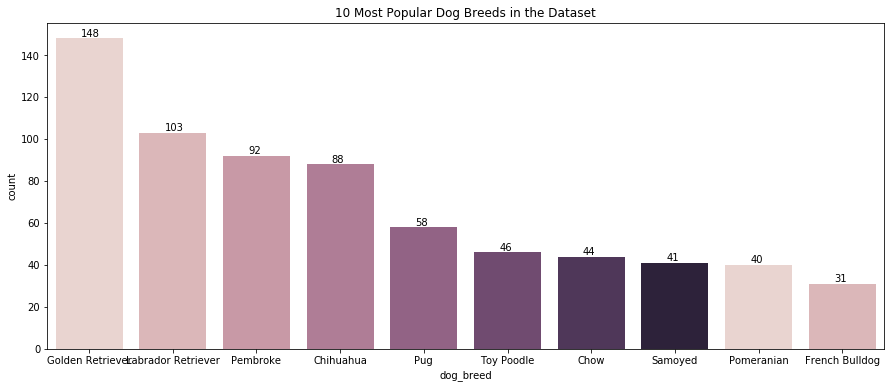

In [278]:
# bar graph of 10 most popular dog breed.
fig, ax = plt.subplots(figsize = (15,6))
ax = sb.countplot(x= "dog_breed", data = df, order = df.dog_breed.value_counts()[:10].index, palette = sb.cubehelix_palette(8))
ax.set_title('10 Most Popular Dog Breeds in the Dataset');

# value 
for x in ax.patches:
    ax.annotate('{:.0f}'.format(x.get_height()), (x.get_x()+0.3, x.get_height() + 1))

### 10 Most popular dog breeds are : 
'Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua','Pug', 'Toy Poodle', 'Chow', 'Samoyed', 'Pomeranian','Malamute'.

In [279]:
# breed_sum is a new dataframe now.
breed_sum = df[['dog_breed', 'favorite_count', 'retweet_count', 'rating_numerator', 'rating_denominator','confidence']].groupby('dog_breed', as_index = False).sum()

In [280]:
breed_sum.sample()

,dog_breed,favorite_count,retweet_count,rating_numerator,rating_denominator,confidence
84,Rottweiler,133174,41161,198.0,180.0,9.242421


#### Favorite counts :

In [281]:
# List of top 10 most favorited, dog_breeds.
breed_sum[['dog_breed', 'favorite_count']].sort_values('favorite_count', ascending = False).iloc[:10]

,dog_breed,favorite_count
44,Golden Retriever,1836534
61,Labrador Retriever,1241781
79,Pembroke,1018273
26,Chihuahua,714126
87,Samoyed,581251
40,French Bulldog,570921
27,Chow,424176
81,Pug,363298
65,Malamute,329223
29,Cocker Spaniel,328620


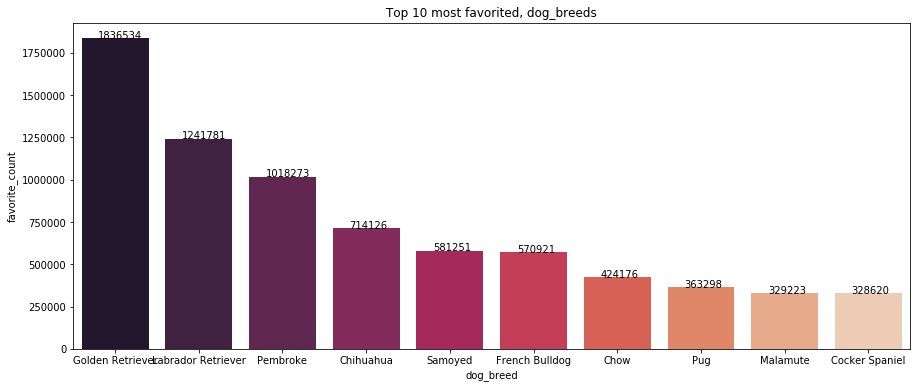

In [282]:
# bar graph of 10 most favorited dog breed.
fig, ax = plt.subplots(figsize = (15,6))
ax = sb.barplot( x = 'dog_breed', y = 'favorite_count', data = breed_sum.sort_values('favorite_count', ascending = False).iloc[:10], palette = 'rocket')
ax.set_title('Top 10 most favorited, dog_breeds');


for x in ax.patches:
    ax.annotate('{:.0f}'.format(x.get_height()), (x.get_x()+0.2, x.get_height() + 4))

### 10 most favorited dog breeds:
'Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua',
       'Samoyed', 'French Bulldog', 'Chow', 'Pug', 'Malamute',
       'Cocker Spaniel'

In [283]:
# List of top 10 most retweeted, dog_breeds.
breed_sum[['dog_breed', 'retweet_count']].sort_values('retweet_count', ascending = False).iloc[:10]

,dog_breed,retweet_count
44,Golden Retriever,550149
61,Labrador Retriever,400712
79,Pembroke,287146
26,Chihuahua,234759
87,Samoyed,202426
40,French Bulldog,156230
27,Chow,124006
80,Pomeranian,110421
81,Pug,110273
29,Cocker Spaniel,106826


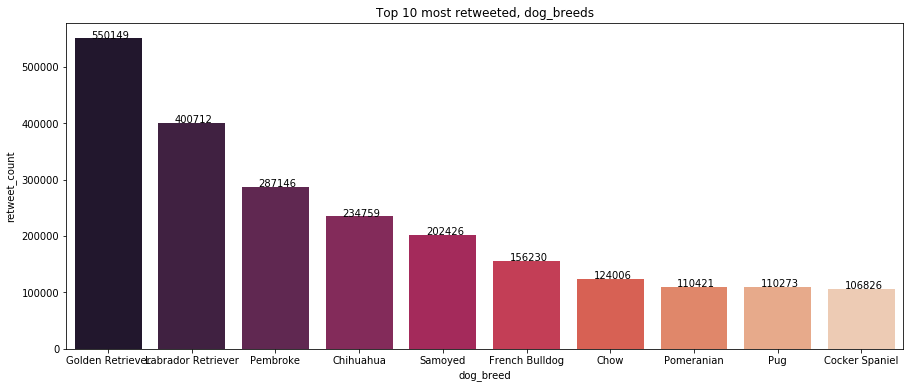

In [284]:
# bar graph of 10 most retweeted dog breed.
fig, ax = plt.subplots(figsize = (15,6))
ax = sb.barplot( x = 'dog_breed', y = 'retweet_count', data = breed_sum.sort_values('retweet_count', ascending = False).iloc[:10], palette = 'rocket')
ax.set_title('Top 10 most retweeted, dog_breeds');

# value 
for x in ax.patches:
    ax.annotate('{:.0f}'.format(x.get_height()), (x.get_x()+0.2, x.get_height() + 4))

### 10 most retweeted dog breeds: 
'Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua',
       'Samoyed', 'French Bulldog', 'Chow', 'Pomeranian', 'Pug',
       'Cocker Spaniel'

###  There are some common breeds which are most favorited and retweeted, as we can see they are also the most popular that is also one of the reason why there is a common breeds in both the lists.

### 2nd Question:
**Highest rated dog_breed according to the average ratings**.

In [285]:
breed_sum['avg_ratings'] = (breed_sum['rating_numerator'] / breed_sum['rating_denominator']) * 100

In [286]:
breed_sum.head()

,dog_breed,favorite_count,retweet_count,rating_numerator,rating_denominator,confidence,avg_ratings
0,Afghan Hound,51980,17928,29.0,30.0,1.301878,96.666667
1,Airedale,63370,16725,118.0,120.0,7.005256,98.333333
2,American Staffordshire Terrier,145956,35690,154.0,150.0,8.422211,102.666667
3,Appenzeller,14635,2916,22.0,20.0,1.007331,110.000000
4,Australian Terrier,22255,6157,23.0,20.0,0.615167,115.000000


In [287]:
# List of 10 best rated, dog breeds.
breed_sum[['dog_breed', 'avg_ratings']].sort_values('avg_ratings', ascending = False).iloc[:10]['dog_breed'].values

array(['Clumber', 'Pomeranian', 'Saluki', 'Briard', 'Tibetan Mastiff',
       'Border Terrier', 'Silky Terrier', 'Standard Schnauzer',
       'Gordon Setter', 'Irish Setter'], dtype=object)

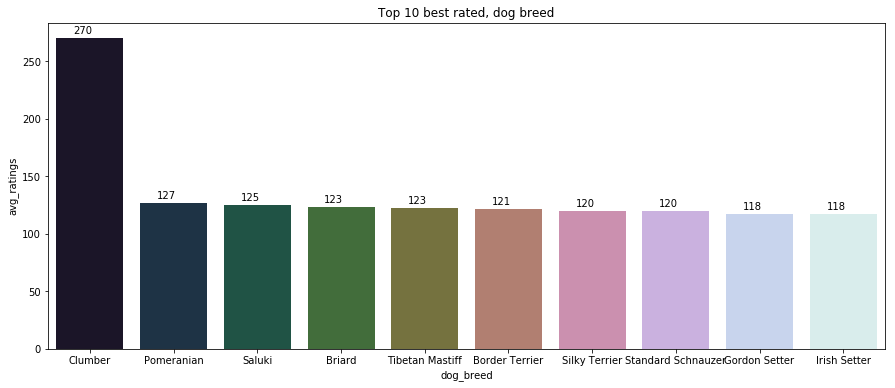

In [288]:
# bar graph of 10 best rated, dog breed.
fig, ax = plt.subplots(figsize = (15,6))
ax = sb.barplot( x = 'dog_breed', y = 'avg_ratings', data = breed_sum.sort_values('avg_ratings', ascending = False).iloc[:10], palette = 'cubehelix')
ax.set_title('Top 10 best rated, dog breed');

# value 
for x in ax.patches:
    ax.annotate('{:.0f}'.format(x.get_height()), (x.get_x()+0.2, x.get_height() + 4))

### 10 best rated, dog breeds:
'Saluki', 'Briard', 'Tibetan Mastiff', 'Border Terrier',
       'Silky Terrier', 'Standard Schnauzer', 'Irish Setter',
       'Gordon Setter', 'Samoyed', 'Golden Retriever'

### 3rd Question:
**Most popular dog_stage (although we have very limited dogs with this data)**.

In [289]:
# List of most popular dog stages, although we can't claim it, as only very few dogs are classified with this.
df.dog_stage.value_counts()

pupper     114
doggo       39
puppo       26
floofer      2
Name: dog_stage, dtype: int64

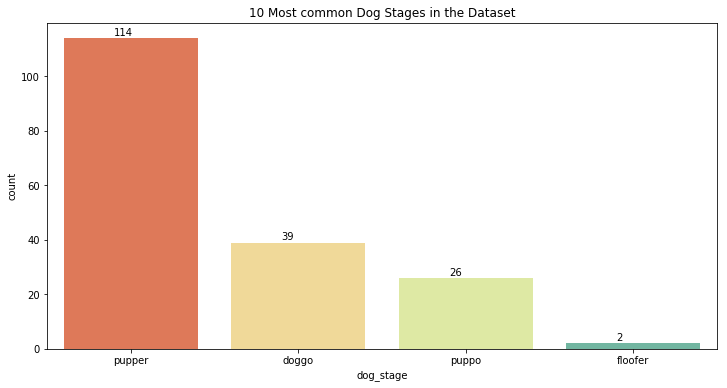

In [290]:
# Bar graph of most common dog stages.
fig, ax = plt.subplots(figsize = (12,6))
ax = sb.countplot(x= "dog_stage", data = df, order = df.dog_stage.value_counts()[:10].index, palette = 'Spectral')
ax.set_title('10 Most common Dog Stages in the Dataset');

# value 
for x in ax.patches:
    ax.annotate('{:.0f}'.format(x.get_height()), (x.get_x()+0.3, x.get_height() + 1))

### Most popular dog_stage (although we have very limited dogs with this data) :
Pupper , doggo, puppo, floofer.

### 4th Question:
**We will see the relationship between the favorite count and retweete count values and growth in the public engagement on the channel over time**.

In [291]:
# converting timestamp into datetime format, as after copying it got changed.
df['timestamp'] = df['timestamp'].astype('datetime64')

In [292]:
# Correlation between favorite and retweet count
np.corrcoef(df.favorite_count, df.retweet_count)[0][1]

0.9120292022611479

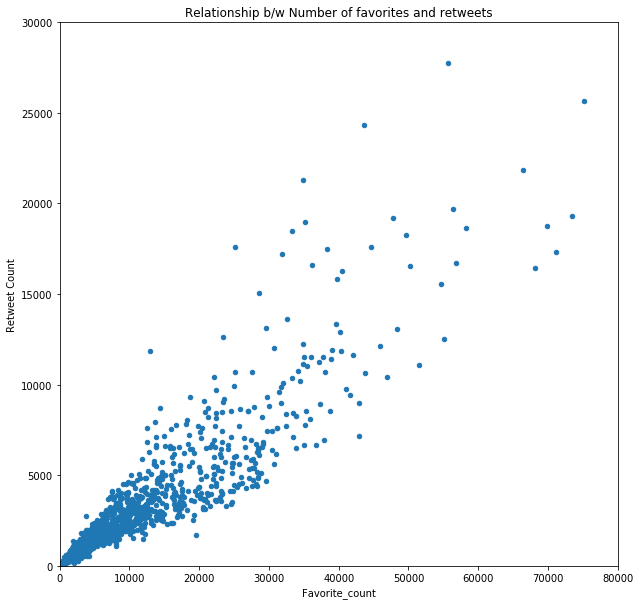

In [293]:
df.plot(x='favorite_count', y='retweet_count', kind='scatter', title='Relationship b/w Number of favorites and retweets', figsize = (10,10))

plt.ylim(0,30000)
plt.xlim(0,80000)
plt.xlabel('Favorite_count')
plt.ylabel('Retweet Count');

### Preety strong correlation between the number of favorites and retweets as we can see (0.91). 

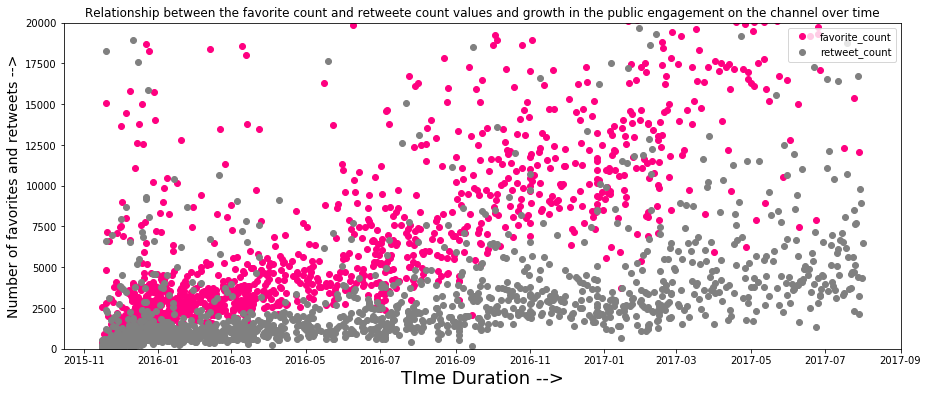

In [294]:
d = pd.DataFrame(df.timestamp)
fig, ax = plt.subplots(figsize=(15,6))
ax.plot_date(d,df.favorite_count, color="#ff0080")
ax.plot_date(d,df.retweet_count, color="gray")
ax.set_title('Relationship between the favorite count and retweete count values and growth in the public engagement on the channel over time')
ax.set_ylim([0,20000])
# Labeling
ax.set_xlabel('TIme Duration -->', fontsize = 18)
ax.set_ylabel('Number of favorites and retweets -->', fontsize = 14)
ax.legend()

### We Rate Dogs got more popular over time and there is also a correlation between number of favorites and retweets.

### 5th Question:
**10 most common dog names**.

In [295]:
df.name.value_counts()[:10]

Charlie    10
Cooper     10
Oliver      9
Lucy        9
Tucker      9
Penny       8
Winston     7
Daisy       7
Sadie       7
Lola        6
Name: name, dtype: int64

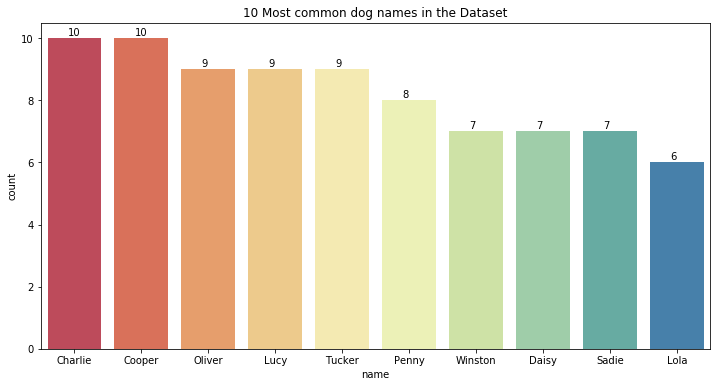

In [296]:
# Bar graph of most common dog names.
fig, ax = plt.subplots(figsize = (12,6))
ax = sb.countplot(x= "name", data = df, order = df.name.value_counts()[:10].index, palette = 'Spectral')
ax.set_title('10 Most common dog names in the Dataset');

# value 
for x in ax.patches:
    ax.annotate('{:.0f}'.format(x.get_height()), (x.get_x()+0.3, x.get_height() + 0.1))

#### 10 most common dog names:
'Cooper', 'Charlie', 'Lucy', 'Oliver', 'Tucker', 'Penny', 'Sadie',
       'Winston', 'Daisy', 'Toby'

### Summary of the investigation:¶
1.
- 10 Most popular breed of dogs -'Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua','Pug', 'Toy Poodle', 'Chow', 'Samoyed', 'Pomeranian','Malamute'.
- 10 most favorited breed of dogs -'Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Samoyed', 'French Bulldog', 'Chow', 'Pug', 'Malamute', 'Cocker Spaniel'
- 10 most retweeted dog breeds -'Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua', 'Samoyed', 'French Bulldog', 'Chow', 'Pomeranian', 'Pug', 'Cocker Spaniel' 

2.
- 10 best rated, dog breeds:'Saluki', 'Briard', 'Tibetan Mastiff', 'Border Terrier', 'Silky Terrier', 'Standard Schnauzer', 'Irish Setter', 'Gordon Setter', 'Samoyed', 'Golden Retriever' 

3.
- Most popular dog_stage (although we have very limited dogs with this data.) : Pupper , doggo, puppo, floofer.

4.

- Preety strong correlation between the number of favorites and retweets as we can see ( 0.91) .
We Rate Dogs got more popular over time and there is also a correlation between number of favorites and retweets.

5.

- 10 most popular dog names - 'Cooper', 'Charlie', 'Lucy', 'Oliver', 'Tucker', 'Penny', 'Sadie', 'Winston', 'Daisy', 'Toby'.